In [1]:
import numpy as np
import PIL.Image
import torch

import dnnlib
import legacy
from wrapper import Generator
from manipulator import Manipulator

import os
os.chdir('..')

/opt/conda/lib/python3.8/site-packages/clip/clip.py:24: UserWarning: PyTorch version 1.7.1 or higher is recommended
  warnings.warn("PyTorch version 1.7.1 or higher is recommended")


In [2]:
device = torch.device('cuda:2')
ckpt = 'pretrained/ffhq.pkl'
G = Generator(ckpt, device)

In [3]:
num_images = 1
lst_alpha=[-5,0,5]
layer= G.style_layers[6]
channel_ind=501

In [4]:
manipulator = Manipulator(G, device, lst_alpha, num_images)

In [5]:
styles = manipulator.manipulate_one_channel(layer, channel_ind)

In [6]:
all_imgs = manipulator.synthesis_from_styles(styles, 0, 5)

Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


In [7]:
all_imgs = [(imgs.permute(0,2,3,1)*127.5+128).clamp(0,255).to(torch.uint8).numpy()
        for imgs in all_imgs]

-5


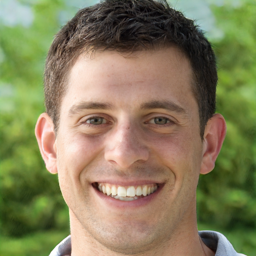

0


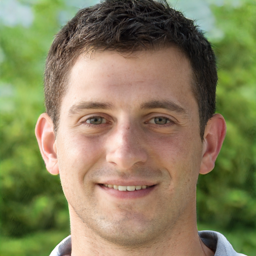

5


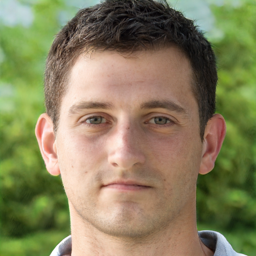

In [8]:
for i, alpha in enumerate(lst_alpha):
    print(alpha)
    imgs = all_imgs[i]
    for img in imgs:
        display(PIL.Image.fromarray(img).resize((256,256)))